# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [5]:
# Extract all rows of data
table = soup.find('table', class_='table')
headers = [header.text.strip() for header in table.find_all('th')]
rows = table.find_all('tr')[1:]

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
data = []

# Loop through the scraped data to create a list of rows
for row in rows:
    cols = [col.text.strip() for col in row.find_all('td')]
    data.append(cols)

In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(data, columns=headers)
df['id'] = df['id'].astype(int)  
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])  
df['sol'] = df['sol'].astype(int) 
df['ls'] = df['ls'].astype(float)  
df['month'] = df['month'].astype(int)  
df['min_temp'] = df['min_temp'].astype(float)  
df['pressure'] = df['pressure'].astype(float)  

In [8]:
# Confirm DataFrame was created successfully
print(df.head())

   id terrestrial_date  sol     ls  month  min_temp  pressure
0   2       2012-08-16   10  155.0      6     -75.0     739.0
1  13       2012-08-17   11  156.0      6     -76.0     740.0
2  24       2012-08-18   12  156.0      6     -76.0     741.0
3  35       2012-08-19   13  157.0      6     -74.0     732.0
4  46       2012-08-20   14  157.0      6     -74.0     740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
print(df.dtypes)

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                         float64
month                        int32
min_temp                   float64
pressure                   float64
dtype: object


In [10]:
# Change data types for data analysis
df['id'] = df['id'].astype(int) 
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])  
df['sol'] = df['sol'].astype(int) 
df['ls'] = df['ls'].astype(float)  
df['month'] = df['month'].astype(int)  
df['min_temp'] = df['min_temp'].astype(float)  
df['pressure'] = df['pressure'].astype(float)  

In [11]:
# Confirm type changes were successful by examining data types again

print(df.dtypes)


id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                         float64
month                        int32
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# 1. How many months are there on Mars?
num_months = df['month'].nunique()
num_months

12

In [13]:
# 2. How many sols (Martian days) worth of data are there?
num_sols = df['sol'].nunique()
num_sols

1867

In [14]:
df['min_temp'] = pd.to_numeric(df['min_temp'], errors='coerce')
avg_min_temp = df.groupby('month')['min_temp'].mean()
print(avg_min_temp)

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


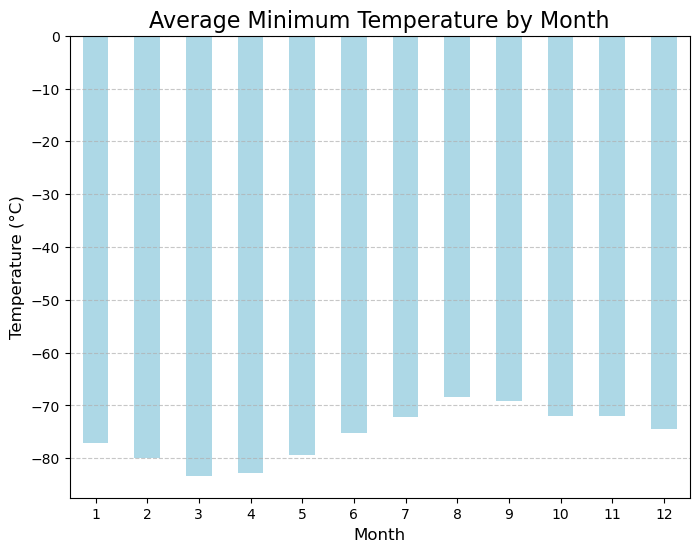

In [15]:
# Plot the average minimum temperature by month
plt.figure(figsize=(8, 6))
avg_min_temp.plot(kind='bar', color='lightblue')
plt.title("Average Minimum Temperature by Month", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Temperature (°C)", fontsize=12)
plt.xticks(rotation=0)  
plt.grid(axis='y', linestyle='--', alpha=0.7)

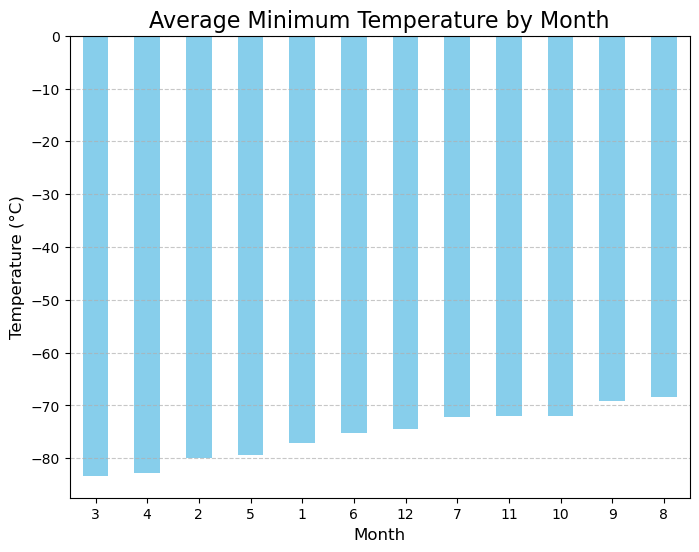

In [16]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
sorted_avg_min_temp = avg_min_temp.sort_values()

plt.figure(figsize=(8, 6))
sorted_avg_min_temp.plot(kind='bar', color='skyblue')
plt.title("Average Minimum Temperature by Month", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Temperature (°C)", fontsize=12)
plt.xticks(rotation=0)  # Keep month labels horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [17]:
# 4. What is the average pressure by month?
avg_pressure = df.groupby('month')['pressure'].mean()

print(avg_pressure)


month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


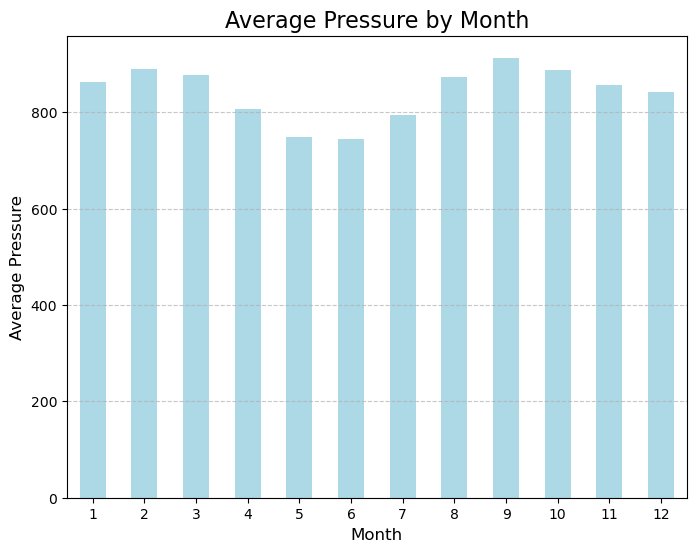

In [18]:
# Plot the average pressure by month
plt.figure(figsize=(8, 6))
avg_pressure.plot(kind='bar', color='lightblue')


plt.title("Average Pressure by Month", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Average Pressure", fontsize=12)
plt.xticks(rotation=0)  # Keep month labels horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.show()

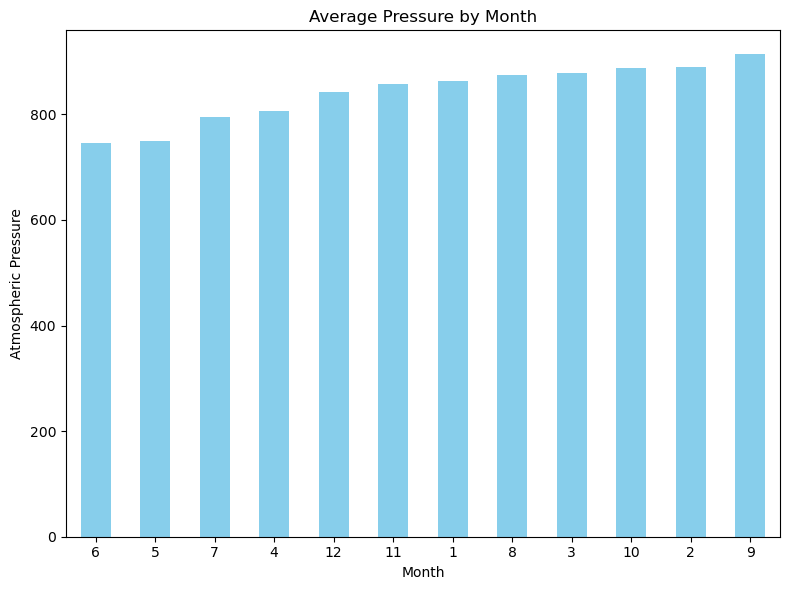

In [19]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
sorted_pressure = avg_pressure.sort_values()

lowest_pressure_month = sorted_pressure.idxmin()
highest_pressure_month = sorted_pressure.idxmax()


sorted_pressure.plot(kind='bar', color='skyblue', figsize=(8, 6))
plt.title('Average Pressure by Month')
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

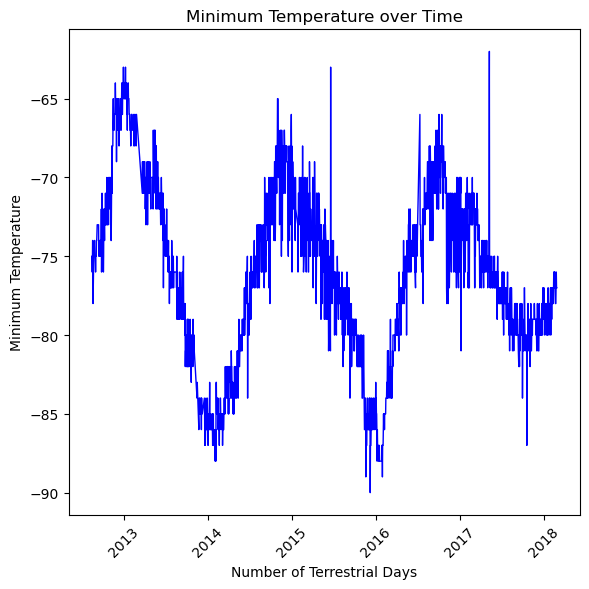

In [20]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
plt.figure(figsize=(6, 6))
plt.plot(df['terrestrial_date'], df['min_temp'], color='blue', lw=1)
plt.title('Minimum Temperature over Time')
plt.xlabel('Number of Terrestrial Days')
plt.ylabel('Minimum Temperature')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Minimum Temperature

The graph of minimum temperature over time shows a clear seasonal pattern on Mars. There are two distinct dips in temperature, suggesting that Mars experiences colder and warmer periods, similar to seasons on Earth. The coldest temperatures drop to approximately -90°C, while the warmest minimum temperatures are around -65°C. This periodic fluctuation indicates a Martian year where temperature changes occur due to its orbit around the Sun.

#### Atmospheric Pressure

Atmospheric pressure on Mars also follows a cyclical pattern throughout the Martian year. The average pressure is lowest during certain months and highest during others, aligning with seasonal changes. This trend may be due to the freezing and sublimation of carbon dioxide in Mars' polar ice caps, which causes fluctuations in atmospheric density. Lower pressures occur during the colder seasons, while higher pressures align with warmer periods when CO₂ sublimates back into the atmosphere.



#### Year Length

By analyzing the graph of minimum temperature, it can be observed that the Martian year consists of approximately 700 to 750 terrestrial days. This is inferred from the two complete cycles of temperature variation observed over the dataset of nearly 1,750 terrestrial days. This result aligns with the known Martian year length of about 687 Earth days, as Mars takes longer to orbit the Sun compared to Earth due to its greater distance from it.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [22]:
# Write the data to a CSV
df.to_csv('mars_weather_data.csv', index=False)
avg_min_temp.to_csv('average_min_temp_by_month.csv', index=True, header=['avg_min_temp'])
avg_pressure.to_csv('average_pressure_by_month.csv', index=True, header=['avg_pressure'])


In [23]:
browser.quit()